In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
stock_list=['AMD', 'AAPL', 'MSFT', 'ORCL']
stocks={}
for i_stock in stock_list:
   stocks[i_stock]= pd.read_csv(str(i_stock + '.csv'), parse_dates=True, index_col='Date')

In [131]:
stocks['AMD'].head()

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


In [132]:
for stock_name, stock_data in stocks.items():
    first_adj_close= stock_data.iloc[0]['Adj Close']
    stock_data['Normalized Return']= stock_data['Adj Close']/first_adj_close

In [133]:
stocks['AAPL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,38.047047,1.000000
2019-01-03,34.257271,0.900392
2019-01-04,35.719696,0.938830
2019-01-07,35.640198,0.936740
2019-01-08,36.319611,0.954597


In [134]:
for stock_name, stock_data in stocks.items():
    stock_data['Allocation']= stock_data['Normalized Return']*0.25

In [135]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,96.632668,1.000000,0.250000
2019-01-03,93.077728,0.963212,0.240803
2019-01-04,97.406723,1.008010,0.252003
2019-01-07,97.530945,1.009296,0.252324
2019-01-08,98.238113,1.016614,0.254153


In [136]:
for stock_name, stock_data in stocks.items():
    stock_data['Position Value']=stock_data['Allocation']*10000

In [137]:
stocks['ORCL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,42.138145,1.000000,0.250000,2500.000000
2019-01-03,41.728134,0.990270,0.247567,2475.674577
2019-01-04,43.526596,1.032950,0.258237,2582.374925
2019-01-07,44.216164,1.049314,0.262329,2623.286049
2019-01-08,44.616867,1.058824,0.264706,2647.059250


In [138]:
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

position_values = pd.DataFrame(data=position_values)
position_values.head()


,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250


In [139]:
position_values['Total']= position_values.sum(axis=1)

In [140]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814


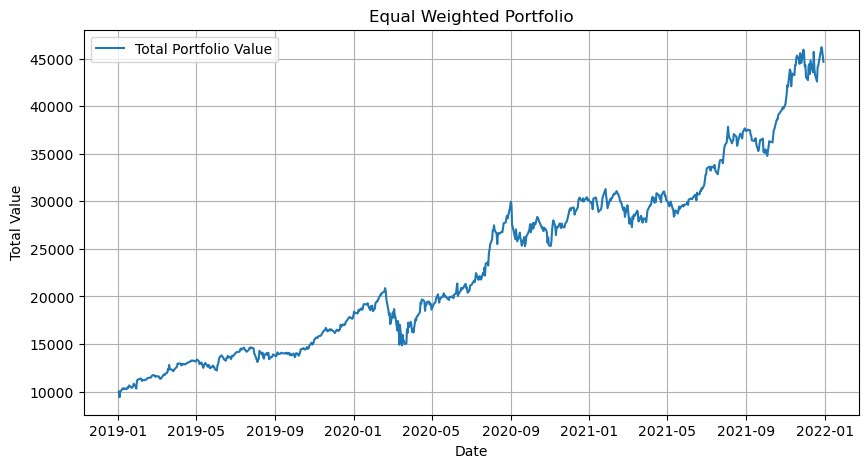

In [166]:
plt.figure(figsize=(10,5))
plt.plot(position_values['Total'], label='Total Portfolio Value')
plt.title('Equal Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.grid(True)
plt.show()


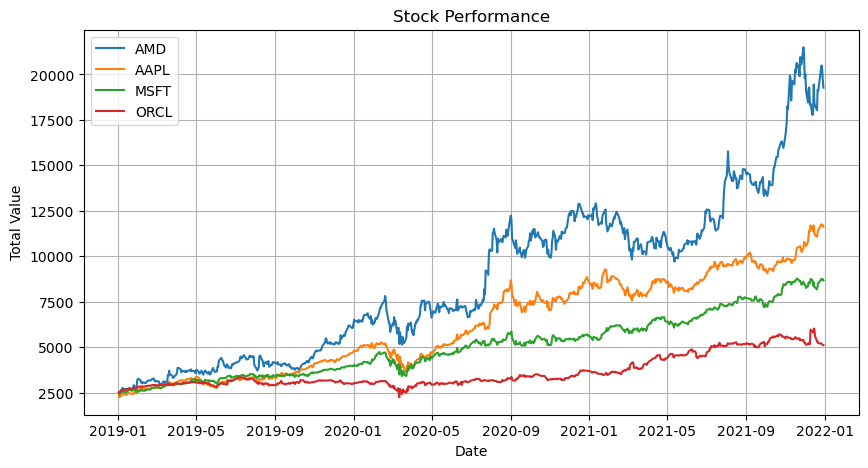

In [174]:
plt.figure(figsize=(10,5))

# Loop through the first 4 columns (individual stock performance)
for column in position_values.columns[0:4]:
    plt.plot(position_values[column], label=column)

plt.title('Stock Performance')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()  # Now shows each stock name
plt.grid(True)
plt.show()


In [178]:
end_value=position_values['Total'].iloc[-1]
start_value= position_values['Total'].iloc[0]
cumulative_return= end_value/start_value-1
print(cumulative_return)

3.4683655744152855


In [184]:
position_values['Daily Returns']= position_values['Total'].pct_change()
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Return,Daily Returns
Date,,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN,NaN
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984,-0.060164,-0.060164
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182,0.061041,0.061041
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319,0.024804,0.024804
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814,0.010823,0.010823


In [188]:
mean_daily_returns= position_values['Daily Returns'].mean()
print('mean daily return is:',str(mean_daily_returns))

mean daily return is: 0.0021983344295164403


In [192]:
std_daily_returns= position_values['Daily Returns'].std()
print('std daily return is:',str(std_daily_returns))

std daily return is: 0.020678297369836975


In [198]:
sharp_ratio= mean_daily_returns/std_daily_returns
annualized_sharp_ratio= sharp_ratio*252**0.5
print('sharp ratio is:',str(sharp_ratio))
print('annualized sharp ratio is:',str(annualized_sharp_ratio))

sharp ratio is: 0.1063111914002701
annualized sharp ratio is: 1.6876378441686195


In [202]:
stock_adj_close={}
for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name]=stock_data['Adj Close']

stock_adj_close= pd.DataFrame(data=stock_adj_close)
stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,38.047047,96.632668,42.138145
2019-01-03,17.049999,34.257271,93.077728,41.728134
2019-01-04,19.000000,35.719696,97.406723,43.526596
2019-01-07,20.570000,35.640198,97.530945,44.216164
2019-01-08,20.750000,36.319611,98.238113,44.616867


In [208]:
stock_returns= stock_adj_close.pct_change()
stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099608,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043100
2019-01-07,0.082632,-0.002226,0.001275,0.015842
2019-01-08,0.008751,0.019063,0.007251,0.009062


In [214]:
scenarios=10000

weight_array= np.zeros((scenarios, len(stock_returns.columns)))
weight_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [216]:
returns_array=np.zeros(scenarios)
volatility_array=np.zeros(scenarios)
sharpe_array=np.zeros(scenarios)

In [238]:
import random
random.seed(3)
np.random.seed(3)
for index in range(scenarios):
    numbers= np.array(np.random.random(4))
    weights= numbers/np.sum(numbers)
    weight_array[index,:]=weights
    returns_array[index]=np.sum(stock_returns.mean()*252*weights)
    volatility_array[index]= np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252,weights)))
    sharpe_array[index]=returns_array[index]/ volatility_array[index]

print('first combination:',weight_array[0])
print('The sharp ratio of the portfolio:',sharpe_array[0])
    




first combination: [0.26728964 0.34364796 0.14116943 0.24789297]
The sharp ratio of the portfolio: 1.774433215177886


In [240]:
sharpe_array.max()

1.832310212575708

In [244]:
index_max_sharpe= sharpe_array.argmax()
index_max_sharpe

8746

In [250]:
print(stock_list)
print(weight_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.29761151 0.55853186 0.13323304 0.0106236 ]


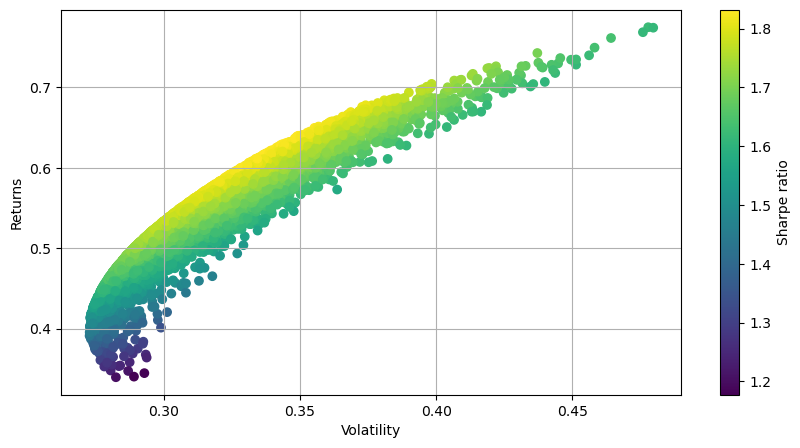

In [262]:
plt.figure(figsize=(10,5))
scatter = plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid(True)
plt.show()  # ← only displays once


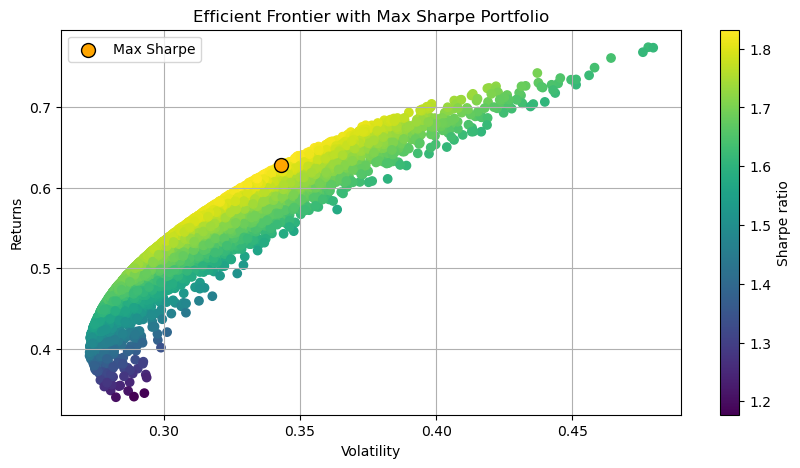

In [268]:
plt.figure(figsize=(10,5))

# Main scatter plot
scatter = plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe ratio')

# Plot the optimal (max Sharpe) point
plt.scatter(max_sharpe_volatility, max_sharpe_returns, c='orange', edgecolors='black', s=100, label='Max Sharpe')

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid(True)
plt.legend()
plt.title('Efficient Frontier with Max Sharpe Portfolio')
plt.show()
